In [1]:
import matplotlib.pyplot as plt     #visualisation
import matplotlib as mat            #visualisation
from tabulate import tabulate     # to print the table
import seaborn as sns               #visualisation
import pandas as pd                  # for data reading, tables strutures
import numpy as np                  # for numerical computation
import statistics as st

In [3]:
df=pd.read_csv('DS1_C5_S2_EmployeeAttrition_Data_Practice.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

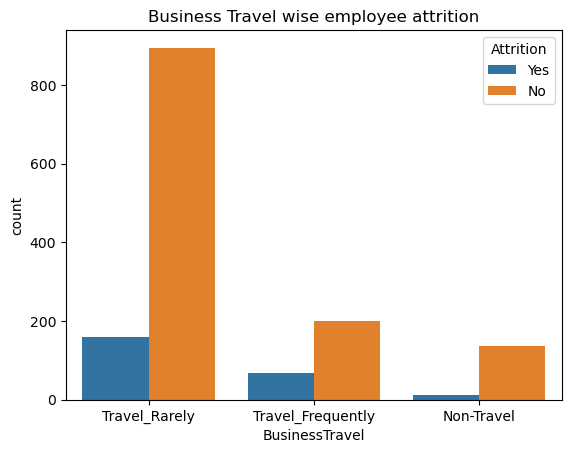

In [7]:
#Task1: Bivariate & multivariate analysis on categorical columns
#a. count plot: buisnes travel wise employee attrition 
#univariate
df['Attrition']=df['Attrition'].fillna(df['Attrition'].mode()[0])
df['BusinessTravel']=df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])
#bivariate
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.title('Business Travel wise employee attrition')
plt.show()

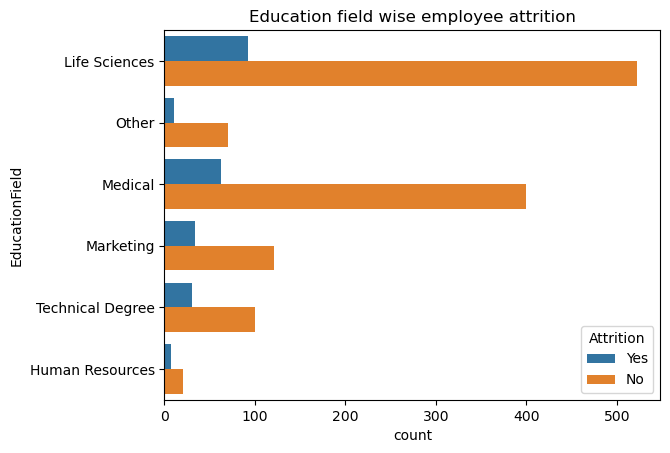

In [9]:
#b. bar chart: educational field wise employee attrition 
#univariate
df['EducationField']=df['EducationField'].fillna(df['EducationField'].mode()[0])
#bivariate
sns.countplot(y='EducationField',hue='Attrition',data=df)
plt.title('Education field wise employee attrition')
plt.show()

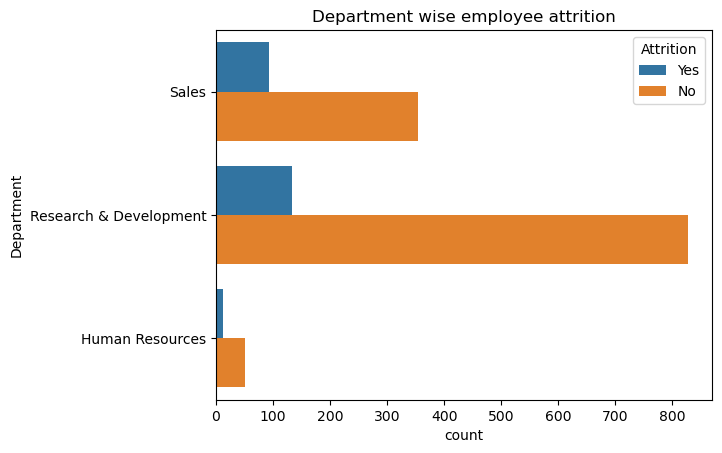

In [11]:
#c. bar chart: department wise employee attrition 
#univariate
df['Department']=df['Department'].fillna(df['Department'].mode()[0])
#bivariate
sns.countplot(y='Department',hue='Attrition',data=df)
plt.title('Department wise employee attrition')
plt.show()

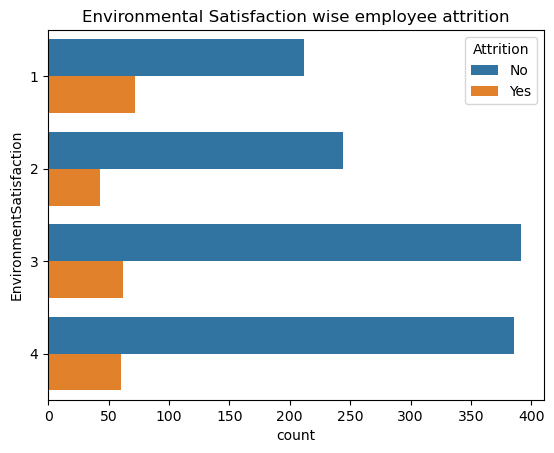

In [13]:
#d. bar chart: EnvironmentSatisfaction wise employee attrition 
#bivariate
sns.countplot(y='EnvironmentSatisfaction',hue='Attrition',data=df)
plt.title('Environmental Satisfaction wise employee attrition')
plt.show()

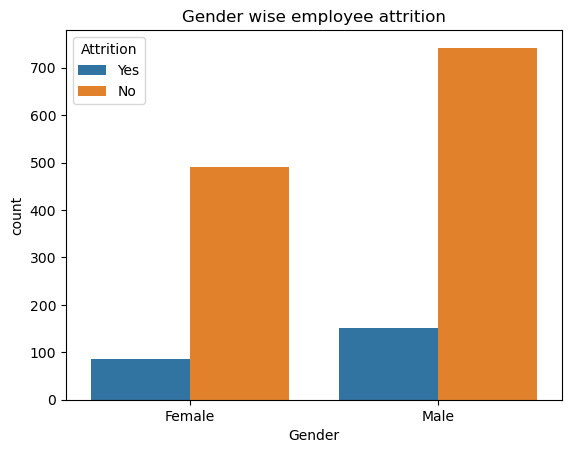

In [15]:
#e. count plot: gender wise employee attrition 
#univariate
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#bivariate
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Gender wise employee attrition')
plt.show()

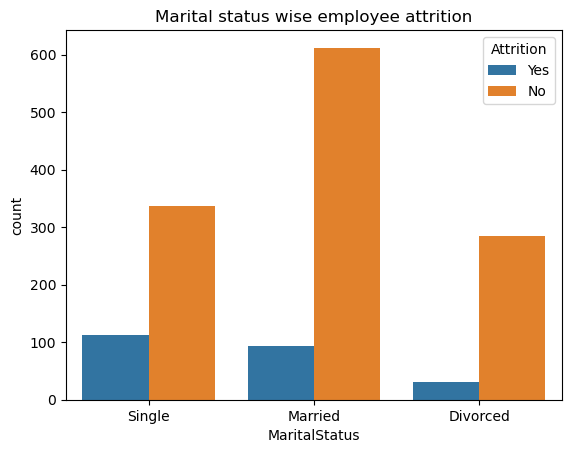

In [17]:
#f. count plot: MaritalStatus wise employee attrition 
#univariate
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
#bivariate
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.title('Marital status wise employee attrition')
plt.show()

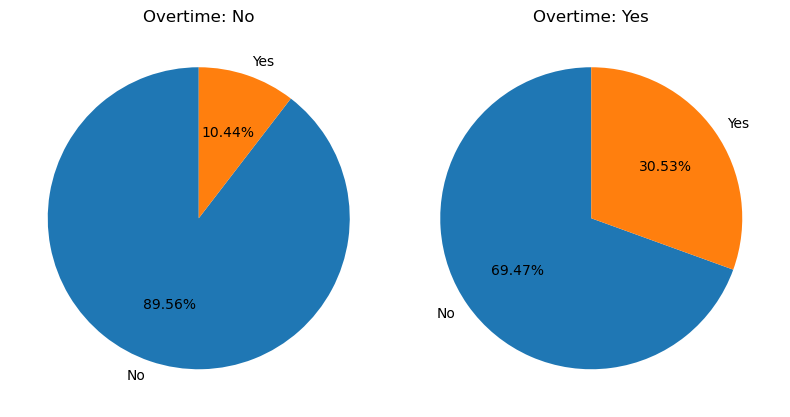

In [19]:
#f. pie chart: overtime wise employee attrition 
# Grouping by Overtime and Attrition, then counting occurrences 
time_att = df.groupby('OverTime')['Attrition'].value_counts().unstack() 
# Plotting pie charts for each overtime category 
fig, ax = plt.subplots(1,2, figsize=(8, 6)) 
# Iterate over the overtime categories to create pie charts 
for idx, overtime in enumerate(time_att.index): 
    ax[idx].pie(time_att.loc[overtime], labels=time_att.columns, autopct='%.2f%%', startangle=90) 
    ax[idx].set_title(f'Overtime: {overtime}') 
    
plt.tight_layout() 
plt.show()

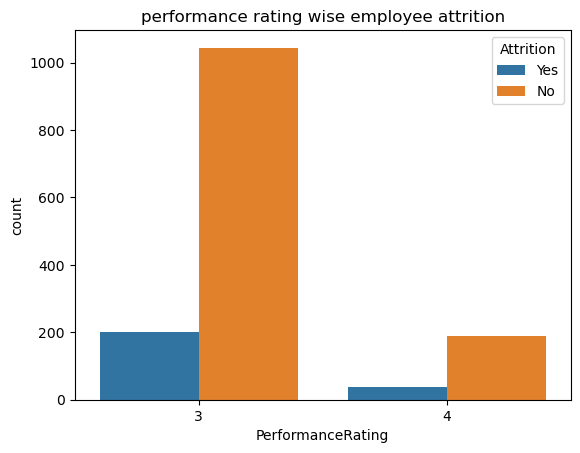

In [21]:
#g. count plot: PerformanceRating wise employee attrition 
#bivariate
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)
plt.title('performance rating wise employee attrition')
plt.show()

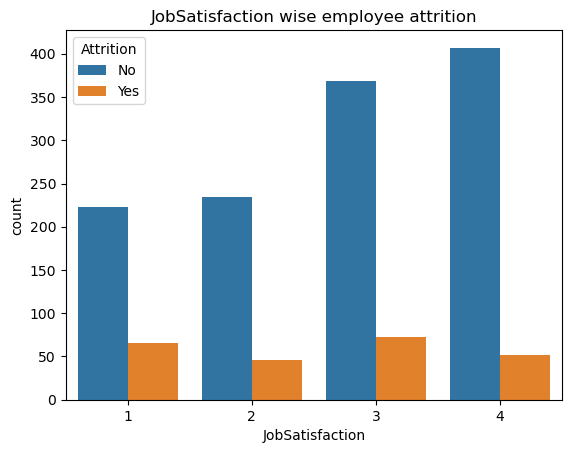

In [23]:
#h. count plot: JobSatisfaction wise employee attrition 
#bivariate
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.title('JobSatisfaction wise employee attrition')
plt.show()

In [25]:
#Task2: Bivariate analysis of numerical column with Attrition analysis using histogram and box plot
def numcol_attrition_anl(col):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].mean()) #univariate analysis
    #bivariate analysis
    figure,ax=plt.subplots(1,2,figsize=(12,7))
    sns.histplot(x=col,hue='Attrition',data=df,ax=ax[0])
    sns.boxplot(x='Attrition',y=col,data=df,ax=ax[1])
    ax[0].set_title(f'{col} category wise distribution of the employee attrition')
    plt.show()

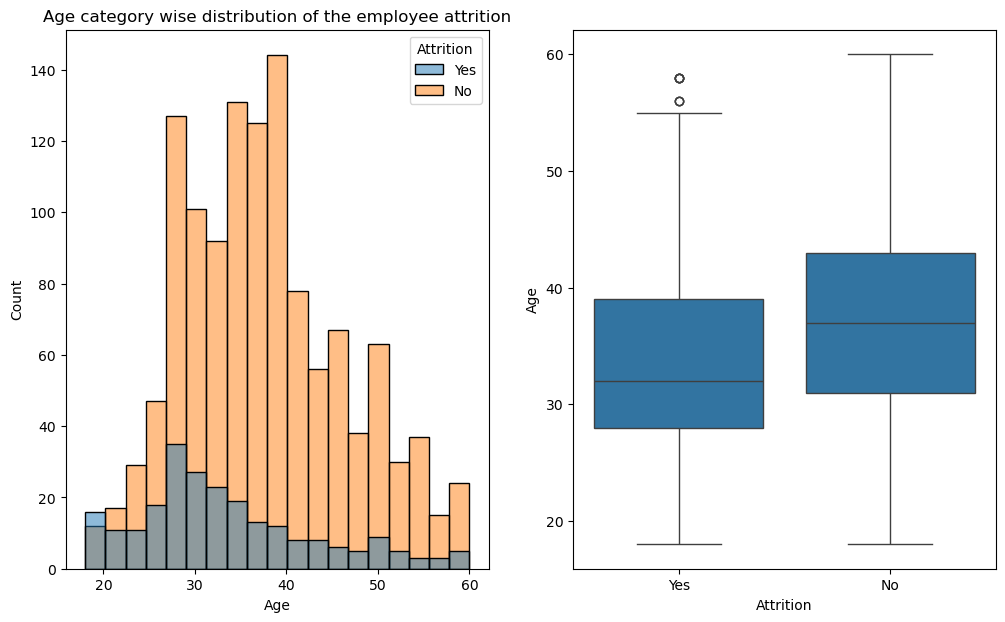

In [27]:
#a.Age column 
numcol_attrition_anl('Age')

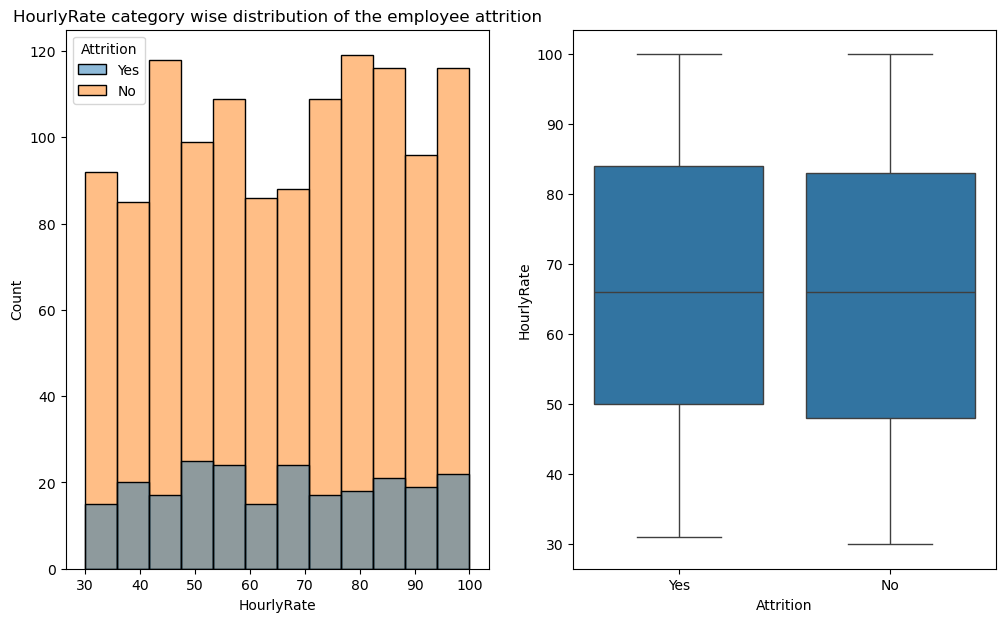

In [29]:
#b. HourlyRate column
numcol_attrition_anl('HourlyRate')

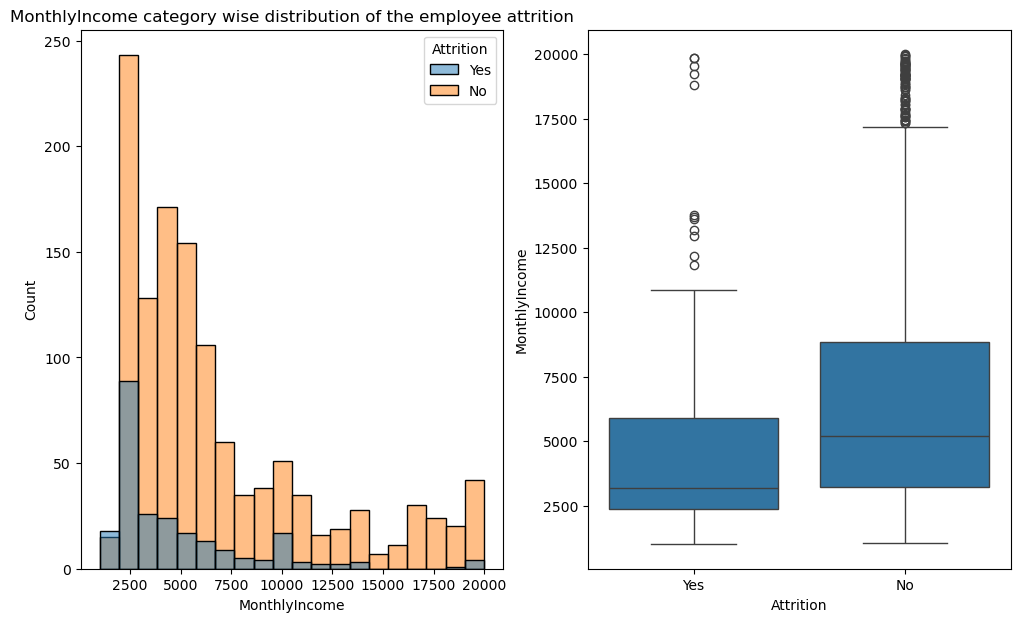

In [31]:
#c. MonthlyIncome column
numcol_attrition_anl('MonthlyIncome')

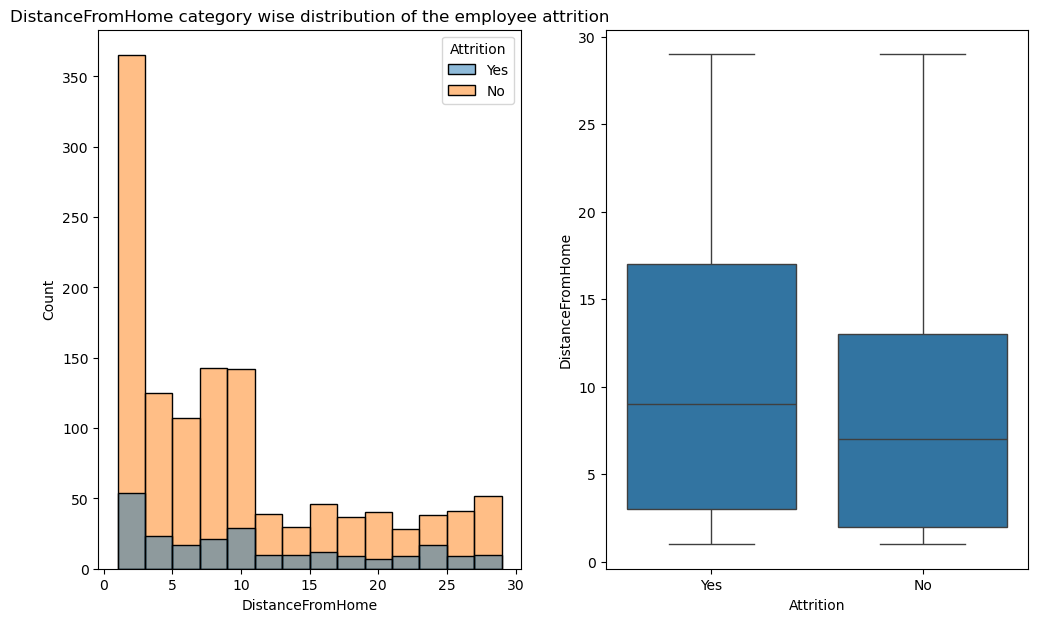

In [33]:
#d. DistanceFromHome column
numcol_attrition_anl('DistanceFromHome')

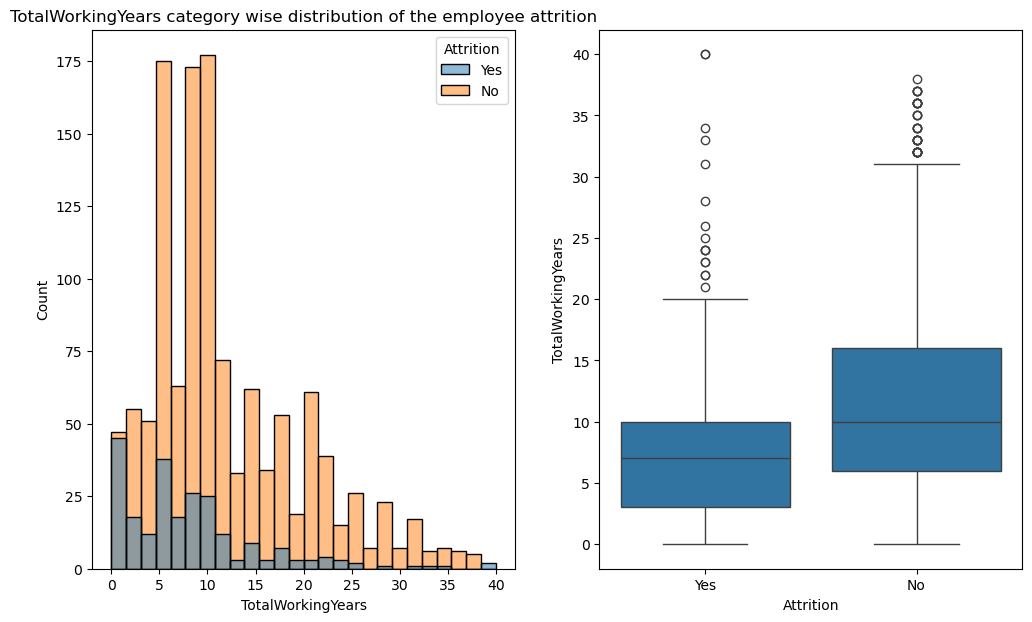

In [35]:
#e. TotalWorkingYears column
numcol_attrition_anl('TotalWorkingYears')

In [37]:
#Task 3: bar chart of job role wise attired employees who rarely travel
df_travel=df[df['BusinessTravel']=='Travel_Rarely'] 
df_travel

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
6,59.0,No,Travel_Rarely,Research & Development,3,Medical,10,3,Female,81,...,Yes,4,1,12,3,2,1,0,0,0
7,30.0,No,Travel_Rarely,Research & Development,24,Life Sciences,11,4,Male,67,...,No,4,2,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0
1465,36.0,No,Travel_Rarely,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3


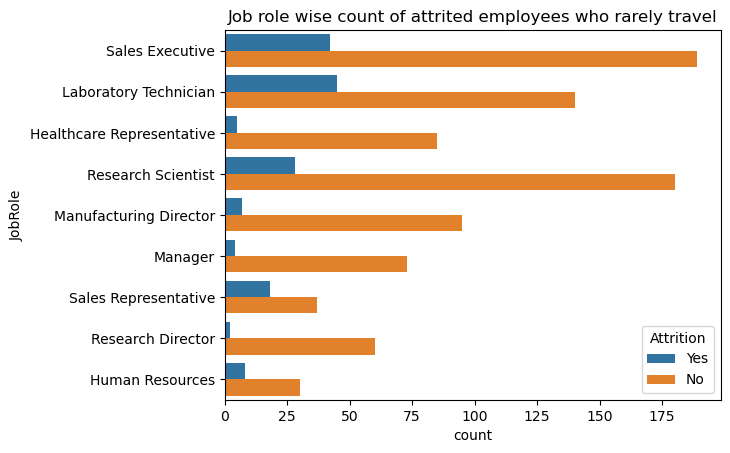

In [39]:
sns.countplot(y='JobRole',hue='Attrition',data=df_travel)
plt.title('Job role wise count of attrited employees who rarely travel')
plt.show() #multi variate analysis

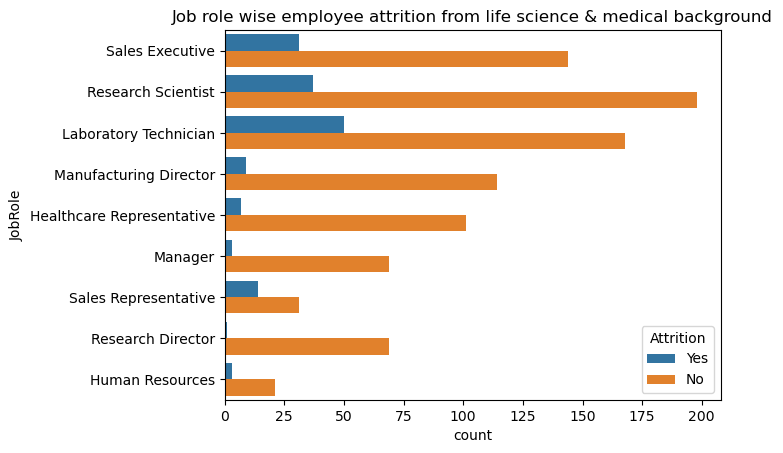

In [47]:
#Task 4: Job role wise employee attrition from life science & medical background
df_edu=df[(df['EducationField']=='Life Sciences')|(df['EducationField']=='Medical')]
sns.countplot(y='JobRole',hue='Attrition',data=df_edu)
plt.title('Job role wise employee attrition from life science & medical background')
plt.show() # multivariate analysis

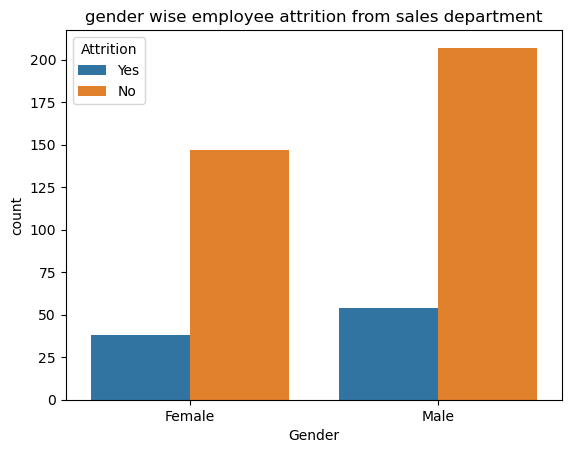

In [43]:
#Task5: gender wise employee attrition from sales department
df_sales=df[df['Department']=='Sales']
sns.countplot(x='Gender',hue='Attrition',data=df_sales)
plt.title('gender wise employee attrition from sales department')
plt.show() # multivariate analysis